In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks/normalizing-flows"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/normalizing-flows


In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from flows import Flow
from flows.affine import Planar, Radial
from flows.sylvester import TriangularSylvester
from models.vae import GatedConvVAE

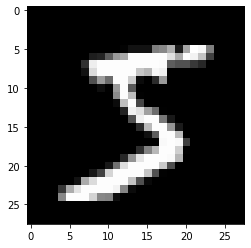

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255
plt.imshow(X_train[0], cmap='gray')

In [0]:
n_layers = 4
flow = Flow(TriangularSylvester())
for i in range(1, n_layers):
    flip_z = i % 2 != 0
    flow(TriangularSylvester(flip_z=flip_z))

In [0]:
x_train = np.expand_dims(X_train, axis=-1)
vae = GatedConvVAE(x_train.shape[1], x_train.shape[2], flow, z_size=32)

In [6]:
vae.fit(x_train, x_train, epochs=10, batch_size=128)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 44s 739us/sample - loss: 0.1990
Epoch 2/10
60000/60000 [==============================] - 37s 622us/sample - loss: 0.1411
Epoch 3/10
60000/60000 [==============================] - 37s 623us/sample - loss: 0.1324
Epoch 4/10
60000/60000 [==============================] - 37s 622us/sample - loss: 0.1283
Epoch 5/10
60000/60000 [==============================] - 37s 622us/sample - loss: 0.1261
Epoch 6/10
60000/60000 [==============================] - 37s 622us/sample - loss: 0.1244
Epoch 7/10
60000/60000 [==============================] - 37s 622us/sample - loss: 0.1233
Epoch 8/10
60000/60000 [==============================] - 37s 622us/sample - loss: 0.1223
Epoch 9/10
60000/60000 [==============================] - 37s 611us/sample - loss: 0.1215
Epoch 10/10
60000/60000 [==============================] - 37s 609us/sample - loss: 0.1208


In [0]:
x_test = np.expand_dims(X_test, axis=-1)
x_pred = vae.predict(x_test)

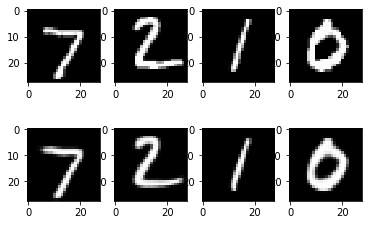

In [8]:
plt.subplot(2,4,1)
plt.imshow(X_test[0], cmap='gray')
plt.subplot(2,4,2)
plt.imshow(X_test[1], cmap='gray')
plt.subplot(2,4,3)
plt.imshow(X_test[2], cmap='gray')
plt.subplot(2,4,4)
plt.imshow(X_test[3], cmap='gray')
plt.subplot(2,4,5)
plt.imshow(x_pred[0].squeeze(), cmap='gray')
plt.subplot(2,4,6)
plt.imshow(x_pred[1].squeeze(), cmap='gray')
plt.subplot(2,4,7)
plt.imshow(x_pred[2].squeeze(), cmap='gray')
plt.subplot(2,4,8)
plt.imshow(x_pred[3].squeeze(), cmap='gray')
plt.show()

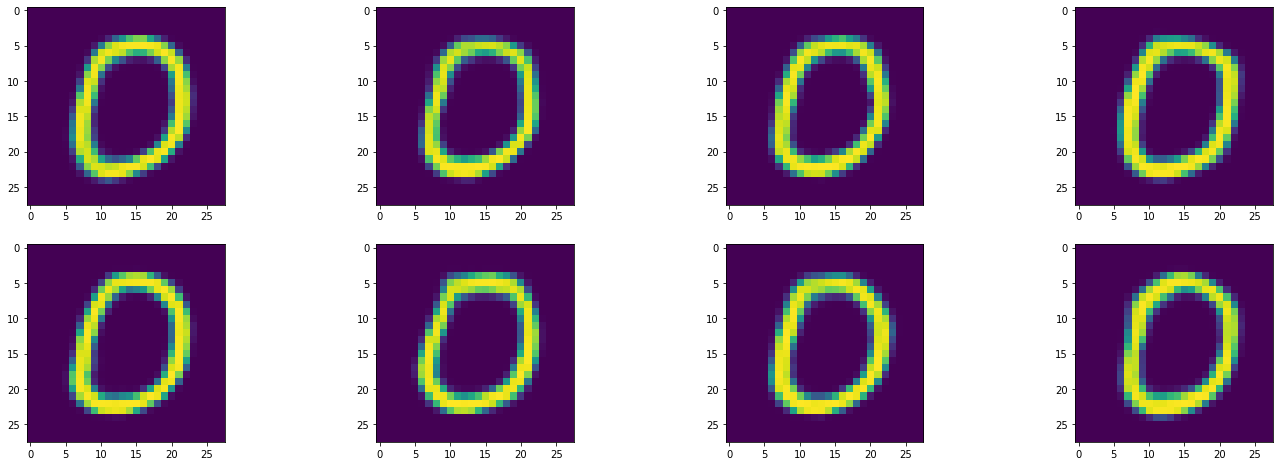

In [9]:
z_mu, z_log_sigma, params = vae.encoder.predict(x_test[10:11])
plt.figure(figsize=(4*6,2*4))
for i in range(1,9):
  x_pred = vae.decoder.predict([z_mu, z_log_sigma, params])
  plt.subplot(2,4,i)
  plt.imshow(tf.squeeze(x_pred).numpy())